# Keras Classification


## The Data

### Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

.. topic:: References

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Data\data tensorflow\cancer_classification.csv')

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# EDA

In [4]:
df.shape

(569, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [7]:
# missig values
df_null = df.isna().sum()
df_null

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

In [8]:
plt.style.use(['science','notebook','grid'])

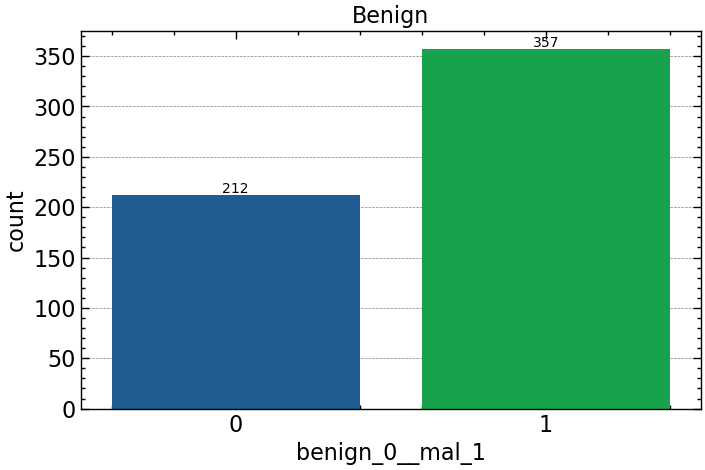

In [9]:
plt.figure(figsize=(8,5), dpi=100)
ax = sns.countplot(x='benign_0__mal_1', data=df);

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + p.get_width()/2, 
            y = height +2, 
            s = '{:.0f}'.format(height), 
            ha = 'center'
           )
plt.title('Benign')
plt.show()

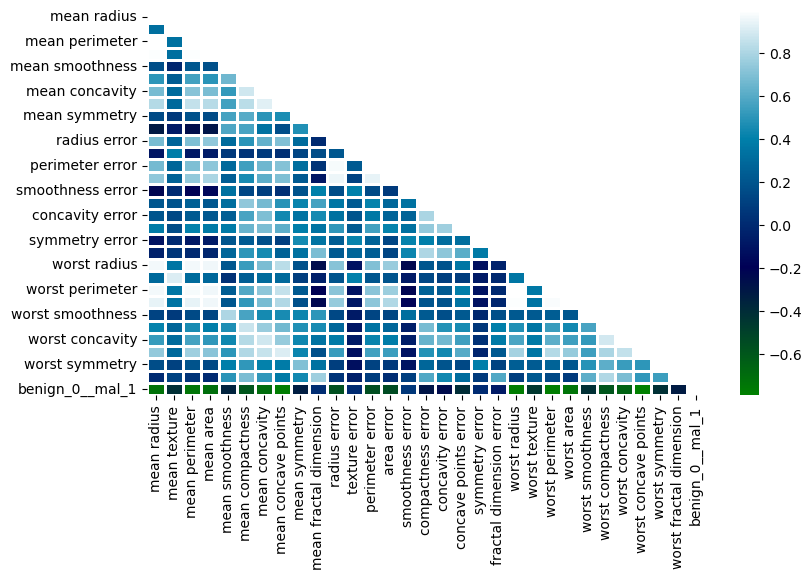

In [10]:
plt.style.use('default')
plt.figure(figsize=(9, 5))
metric = df.corr()
mask = np.zeros_like(metric)
mask[np.triu_indices_from(mask)]=True

sns.heatmap(metric, mask=mask, cmap='ocean', lw=2);

In [11]:
df.corr()['benign_0__mal_1'].sort_values(ascending=False)

benign_0__mal_1            1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean perimeter            -0.742636
worst radius              -0

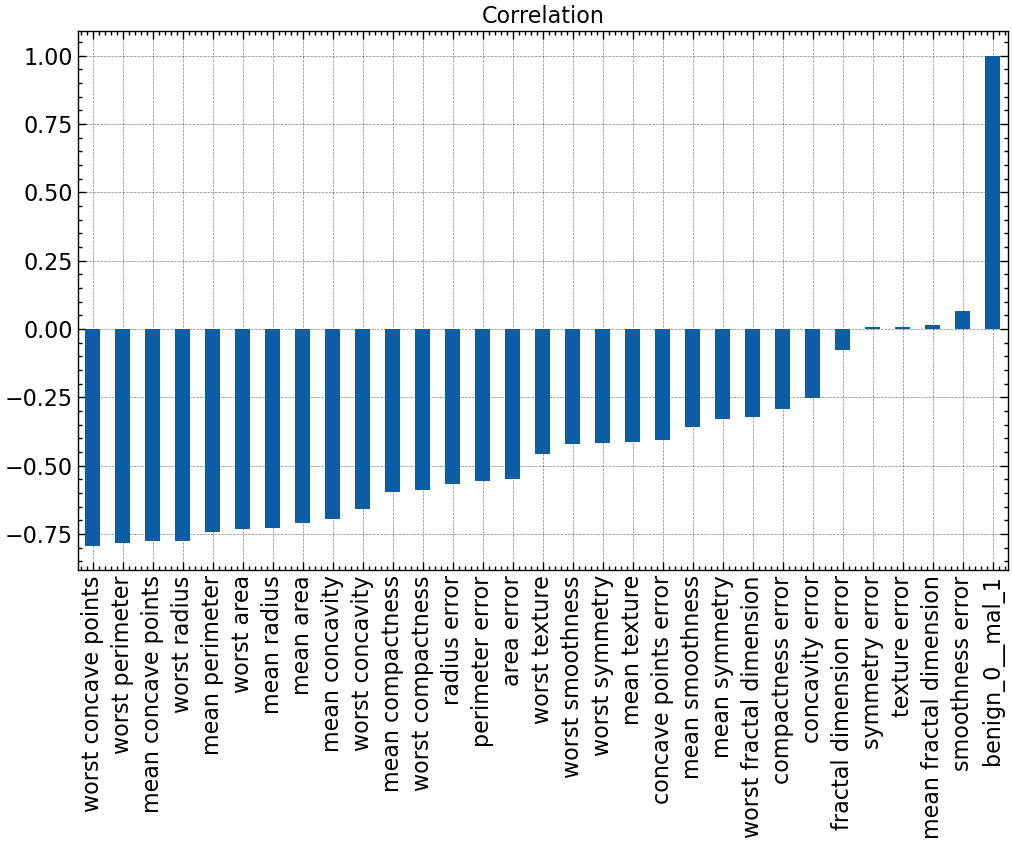

In [12]:
plt.style.use(['science','notebook','grid'])

df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar', figsize=(12, 7));
plt.title('Correlation');

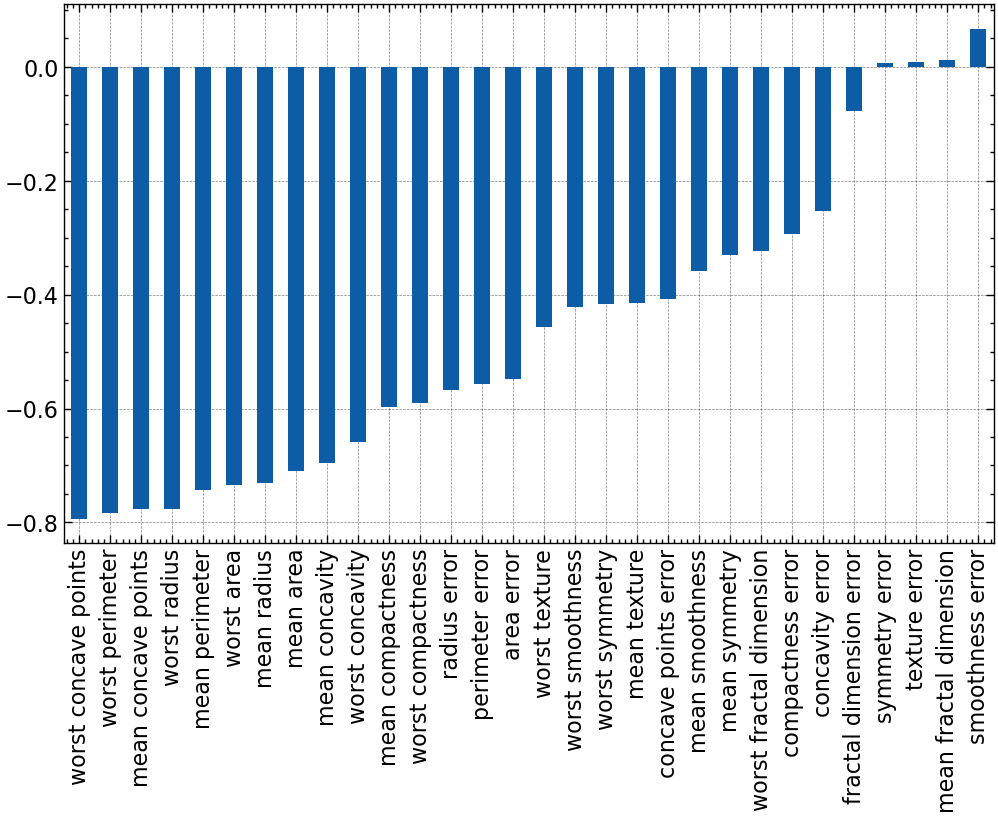

In [13]:
df.corr()['benign_0__mal_1'].sort_values().iloc[:-1].plot(kind='bar', figsize=(12, 7));

## Train Test  Split

In [14]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state =101)

In [17]:
X_train.shape

(398, 30)

## Scaler Data

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()

In [20]:
X_train = scaler.fit_transform(X_train)

In [21]:
X_test = scaler.transform(X_test)

In [22]:
X_train.shape

(398, 30)

In [23]:
X_test.shape

(171, 30)

## Create Model

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [25]:
model = Sequential()
model.add(Dense(30, activation='relu')) # input layers
model.add(Dense(15, activation='relu')) # hidden layers
model.add(Dense(1, activation='sigmoid')) # output layers

# model compile
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Fitting Model

<b> terlalu banyak epoch menyebabkan overfitting

In [26]:
model.fit(X_train, y_train, 
          epochs = 600, 
          validation_data = (X_test, y_test), 
          verbose = 1)

Epoch 1/600
13/13 [==============================] - 3s 85ms/step - loss: 0.6872 - accuracy: 0.3869 - val_loss: 0.6774 - val_accuracy: 0.5146
Epoch 2/600
13/13 [==============================] - 0s 19ms/step - loss: 0.6664 - accuracy: 0.7688 - val_loss: 0.6603 - val_accuracy: 0.8187
Epoch 3/600
13/13 [==============================] - 0s 17ms/step - loss: 0.6449 - accuracy: 0.8568 - val_loss: 0.6371 - val_accuracy: 0.8304
Epoch 4/600
13/13 [==============================] - 0s 19ms/step - loss: 0.6177 - accuracy: 0.8819 - val_loss: 0.6089 - val_accuracy: 0.8655
Epoch 5/600
13/13 [==============================] - 0s 17ms/step - loss: 0.5843 - accuracy: 0.8894 - val_loss: 0.5751 - val_accuracy: 0.8830
Epoch 6/600
13/13 [==============================] - 0s 17ms/step - loss: 0.5455 - accuracy: 0.8970 - val_loss: 0.5348 - val_accuracy: 0.8772
Epoch 7/600
13/13 [==============================] - 0s 18ms/step - loss: 0.5010 - accuracy: 0.8844 - val_loss: 0.4915 - val_accuracy: 0.8830
Epoch 

13/13 [==============================] - 0s 16ms/step - loss: 0.0356 - accuracy: 0.9899 - val_loss: 0.1194 - val_accuracy: 0.9708
Epoch 116/600
13/13 [==============================] - 0s 13ms/step - loss: 0.0378 - accuracy: 0.9849 - val_loss: 0.1202 - val_accuracy: 0.9708
Epoch 117/600
13/13 [==============================] - 0s 14ms/step - loss: 0.0408 - accuracy: 0.9824 - val_loss: 0.1193 - val_accuracy: 0.9766
Epoch 118/600
13/13 [==============================] - 0s 13ms/step - loss: 0.0433 - accuracy: 0.9824 - val_loss: 0.1188 - val_accuracy: 0.9708
Epoch 119/600
13/13 [==============================] - 0s 15ms/step - loss: 0.0448 - accuracy: 0.9774 - val_loss: 0.1182 - val_accuracy: 0.9708
Epoch 120/600
13/13 [==============================] - 0s 14ms/step - loss: 0.0399 - accuracy: 0.9874 - val_loss: 0.1186 - val_accuracy: 0.9708
Epoch 121/600
13/13 [==============================] - 0s 14ms/step - loss: 0.0338 - accuracy: 0.9874 - val_loss: 0.1193 - val_accuracy: 0.9825
Epoch 

Epoch 172/600
13/13 [==============================] - 0s 21ms/step - loss: 0.0283 - accuracy: 0.9899 - val_loss: 0.1178 - val_accuracy: 0.9766
Epoch 173/600
13/13 [==============================] - 0s 21ms/step - loss: 0.0280 - accuracy: 0.9899 - val_loss: 0.1187 - val_accuracy: 0.9708
Epoch 174/600
13/13 [==============================] - 0s 17ms/step - loss: 0.0286 - accuracy: 0.9849 - val_loss: 0.1183 - val_accuracy: 0.9708
Epoch 175/600
13/13 [==============================] - 0s 15ms/step - loss: 0.0289 - accuracy: 0.9899 - val_loss: 0.1173 - val_accuracy: 0.9708
Epoch 176/600
13/13 [==============================] - 0s 16ms/step - loss: 0.0276 - accuracy: 0.9899 - val_loss: 0.1217 - val_accuracy: 0.9649
Epoch 177/600
13/13 [==============================] - 0s 16ms/step - loss: 0.0303 - accuracy: 0.9849 - val_loss: 0.1169 - val_accuracy: 0.9708
Epoch 178/600
13/13 [==============================] - 0s 15ms/step - loss: 0.0300 - accuracy: 0.9874 - val_loss: 0.1177 - val_accuracy:

Epoch 229/600
13/13 [==============================] - 0s 14ms/step - loss: 0.0240 - accuracy: 0.9899 - val_loss: 0.1166 - val_accuracy: 0.9708
Epoch 230/600
13/13 [==============================] - 0s 13ms/step - loss: 0.0236 - accuracy: 0.9899 - val_loss: 0.1176 - val_accuracy: 0.9708
Epoch 231/600
13/13 [==============================] - 0s 18ms/step - loss: 0.0249 - accuracy: 0.9899 - val_loss: 0.1165 - val_accuracy: 0.9708
Epoch 232/600
13/13 [==============================] - 0s 16ms/step - loss: 0.0257 - accuracy: 0.9874 - val_loss: 0.1163 - val_accuracy: 0.9708
Epoch 233/600
13/13 [==============================] - 0s 16ms/step - loss: 0.0242 - accuracy: 0.9874 - val_loss: 0.1161 - val_accuracy: 0.9708
Epoch 234/600
13/13 [==============================] - 0s 15ms/step - loss: 0.0243 - accuracy: 0.9925 - val_loss: 0.1168 - val_accuracy: 0.9708
Epoch 235/600
13/13 [==============================] - 0s 16ms/step - loss: 0.0248 - accuracy: 0.9849 - val_loss: 0.1181 - val_accuracy:

Epoch 286/600
13/13 [==============================] - 0s 14ms/step - loss: 0.0260 - accuracy: 0.9899 - val_loss: 0.1120 - val_accuracy: 0.9708
Epoch 287/600
13/13 [==============================] - 0s 13ms/step - loss: 0.0210 - accuracy: 0.9925 - val_loss: 0.1124 - val_accuracy: 0.9825
Epoch 288/600
13/13 [==============================] - 0s 13ms/step - loss: 0.0229 - accuracy: 0.9899 - val_loss: 0.1151 - val_accuracy: 0.9708
Epoch 289/600
13/13 [==============================] - 0s 14ms/step - loss: 0.0213 - accuracy: 0.9925 - val_loss: 0.1119 - val_accuracy: 0.9708
Epoch 290/600
13/13 [==============================] - 0s 13ms/step - loss: 0.0206 - accuracy: 0.9899 - val_loss: 0.1126 - val_accuracy: 0.9708
Epoch 291/600
13/13 [==============================] - 0s 14ms/step - loss: 0.0237 - accuracy: 0.9925 - val_loss: 0.1122 - val_accuracy: 0.9708
Epoch 292/600
13/13 [==============================] - 0s 14ms/step - loss: 0.0216 - accuracy: 0.9874 - val_loss: 0.1125 - val_accuracy:

Epoch 343/600
13/13 [==============================] - 0s 16ms/step - loss: 0.0196 - accuracy: 0.9874 - val_loss: 0.1199 - val_accuracy: 0.9591
Epoch 344/600
13/13 [==============================] - 0s 15ms/step - loss: 0.0181 - accuracy: 0.9899 - val_loss: 0.1177 - val_accuracy: 0.9708
Epoch 345/600
13/13 [==============================] - 0s 15ms/step - loss: 0.0182 - accuracy: 0.9925 - val_loss: 0.1156 - val_accuracy: 0.9708
Epoch 346/600
13/13 [==============================] - 0s 16ms/step - loss: 0.0212 - accuracy: 0.9874 - val_loss: 0.1178 - val_accuracy: 0.9649
Epoch 347/600
13/13 [==============================] - 0s 15ms/step - loss: 0.0181 - accuracy: 0.9925 - val_loss: 0.1163 - val_accuracy: 0.9708
Epoch 348/600
13/13 [==============================] - 0s 16ms/step - loss: 0.0179 - accuracy: 0.9925 - val_loss: 0.1184 - val_accuracy: 0.9649
Epoch 349/600
13/13 [==============================] - 0s 16ms/step - loss: 0.0179 - accuracy: 0.9874 - val_loss: 0.1170 - val_accuracy:

Epoch 400/600
13/13 [==============================] - 0s 15ms/step - loss: 0.0175 - accuracy: 0.9925 - val_loss: 0.1241 - val_accuracy: 0.9591
Epoch 401/600
13/13 [==============================] - 0s 16ms/step - loss: 0.0164 - accuracy: 0.9874 - val_loss: 0.1192 - val_accuracy: 0.9649
Epoch 402/600
13/13 [==============================] - 0s 15ms/step - loss: 0.0153 - accuracy: 0.9925 - val_loss: 0.1192 - val_accuracy: 0.9649
Epoch 403/600
13/13 [==============================] - 0s 15ms/step - loss: 0.0153 - accuracy: 0.9950 - val_loss: 0.1200 - val_accuracy: 0.9649
Epoch 404/600
13/13 [==============================] - 0s 16ms/step - loss: 0.0168 - accuracy: 0.9925 - val_loss: 0.1178 - val_accuracy: 0.9649
Epoch 405/600
13/13 [==============================] - 0s 16ms/step - loss: 0.0195 - accuracy: 0.9925 - val_loss: 0.1200 - val_accuracy: 0.9649
Epoch 406/600
13/13 [==============================] - 0s 15ms/step - loss: 0.0215 - accuracy: 0.9925 - val_loss: 0.1181 - val_accuracy:

Epoch 457/600
13/13 [==============================] - 0s 14ms/step - loss: 0.0139 - accuracy: 0.9950 - val_loss: 0.1268 - val_accuracy: 0.9649
Epoch 458/600
13/13 [==============================] - 0s 13ms/step - loss: 0.0134 - accuracy: 0.9950 - val_loss: 0.1286 - val_accuracy: 0.9649
Epoch 459/600
13/13 [==============================] - 0s 14ms/step - loss: 0.0141 - accuracy: 0.9925 - val_loss: 0.1296 - val_accuracy: 0.9649
Epoch 460/600
13/13 [==============================] - 0s 13ms/step - loss: 0.0148 - accuracy: 0.9950 - val_loss: 0.1279 - val_accuracy: 0.9649
Epoch 461/600
13/13 [==============================] - 0s 13ms/step - loss: 0.0161 - accuracy: 0.9925 - val_loss: 0.1267 - val_accuracy: 0.9649
Epoch 462/600
13/13 [==============================] - 0s 13ms/step - loss: 0.0153 - accuracy: 0.9899 - val_loss: 0.1268 - val_accuracy: 0.9649
Epoch 463/600
13/13 [==============================] - 0s 14ms/step - loss: 0.0137 - accuracy: 0.9950 - val_loss: 0.1293 - val_accuracy:

Epoch 514/600
13/13 [==============================] - 0s 14ms/step - loss: 0.0130 - accuracy: 0.9925 - val_loss: 0.1333 - val_accuracy: 0.9649
Epoch 515/600
13/13 [==============================] - 0s 14ms/step - loss: 0.0113 - accuracy: 0.9975 - val_loss: 0.1365 - val_accuracy: 0.9649
Epoch 516/600
13/13 [==============================] - 0s 14ms/step - loss: 0.0099 - accuracy: 1.0000 - val_loss: 0.1368 - val_accuracy: 0.9766
Epoch 517/600
13/13 [==============================] - 0s 14ms/step - loss: 0.0147 - accuracy: 0.9899 - val_loss: 0.1325 - val_accuracy: 0.9649
Epoch 518/600
13/13 [==============================] - 0s 14ms/step - loss: 0.0115 - accuracy: 0.9975 - val_loss: 0.1346 - val_accuracy: 0.9649
Epoch 519/600
13/13 [==============================] - 0s 13ms/step - loss: 0.0123 - accuracy: 0.9925 - val_loss: 0.1373 - val_accuracy: 0.9649
Epoch 520/600
13/13 [==============================] - 0s 14ms/step - loss: 0.0122 - accuracy: 0.9975 - val_loss: 0.1368 - val_accuracy:

Epoch 571/600
13/13 [==============================] - 0s 16ms/step - loss: 0.0144 - accuracy: 0.9950 - val_loss: 0.1483 - val_accuracy: 0.9708
Epoch 572/600
13/13 [==============================] - 0s 16ms/step - loss: 0.0138 - accuracy: 0.9899 - val_loss: 0.1495 - val_accuracy: 0.9591
Epoch 573/600
13/13 [==============================] - 0s 15ms/step - loss: 0.0124 - accuracy: 0.9925 - val_loss: 0.1498 - val_accuracy: 0.9591
Epoch 574/600
13/13 [==============================] - 0s 17ms/step - loss: 0.0103 - accuracy: 0.9950 - val_loss: 0.1480 - val_accuracy: 0.9649
Epoch 575/600
13/13 [==============================] - 0s 15ms/step - loss: 0.0090 - accuracy: 0.9975 - val_loss: 0.1495 - val_accuracy: 0.9649
Epoch 576/600
13/13 [==============================] - 0s 16ms/step - loss: 0.0091 - accuracy: 0.9975 - val_loss: 0.1496 - val_accuracy: 0.9649
Epoch 577/600
13/13 [==============================] - 0s 16ms/step - loss: 0.0088 - accuracy: 1.0000 - val_loss: 0.1485 - val_accuracy:

In [27]:
losses = pd.DataFrame(model.history.history)

In [28]:
losses

,loss,accuracy,val_loss,val_accuracy
0,0.687246,0.386935,0.677444,0.514620
1,0.666415,0.768844,0.660340,0.818713
2,0.644912,0.856784,0.637080,0.830409
3,0.617650,0.881910,0.608877,0.865497
4,0.584324,0.889447,0.575131,0.883041
...,...,...,...,...
595,0.008453,1.000000,0.150906,0.964912
596,0.010935,0.997487,0.150459,0.964912
597,0.008991,0.997487,0.149120,0.964912
598,0.009869,0.997487,0.156077,0.964912


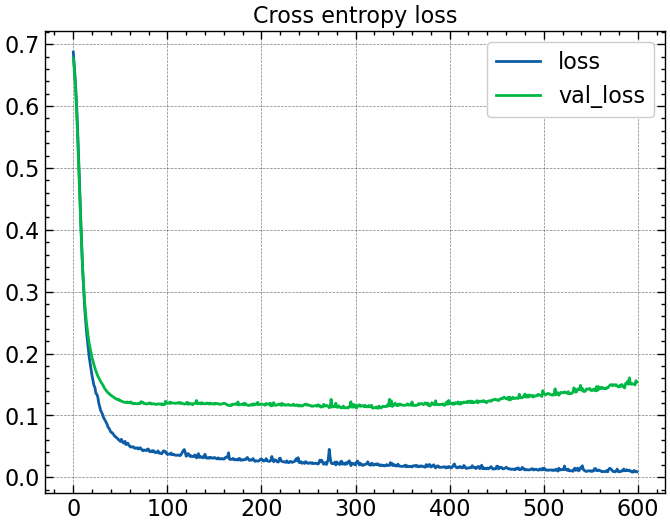

In [29]:
losses[['loss', 'val_loss']].plot();
plt.title('Cross entropy loss');

<b> Model terlalu overfitting

## Menambahkan EarlyStopping

In [30]:
model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics ='accuracy')

In [31]:
from tensorflow.keras.callbacks import EarlyStopping 

In [32]:
early_stop = EarlyStopping(monitor='val_loss', patience=25)

##  Fitting ulang

In [33]:
model.fit(X_train, y_train,
          epochs =600, 
          validation_data = (X_test, y_test), 
          callbacks=[early_stop], 
          verbose = 1)

Epoch 1/600
13/13 [==============================] - 3s 70ms/step - loss: 0.6675 - accuracy: 0.6884 - val_loss: 0.6561 - val_accuracy: 0.7193
Epoch 2/600
13/13 [==============================] - 0s 17ms/step - loss: 0.6397 - accuracy: 0.7764 - val_loss: 0.6308 - val_accuracy: 0.7661
Epoch 3/600
13/13 [==============================] - 0s 18ms/step - loss: 0.6118 - accuracy: 0.8392 - val_loss: 0.6024 - val_accuracy: 0.8421
Epoch 4/600
13/13 [==============================] - 0s 18ms/step - loss: 0.5807 - accuracy: 0.8568 - val_loss: 0.5710 - val_accuracy: 0.8655
Epoch 5/600
13/13 [==============================] - 0s 19ms/step - loss: 0.5441 - accuracy: 0.8769 - val_loss: 0.5305 - val_accuracy: 0.8889
Epoch 6/600
13/13 [==============================] - 0s 18ms/step - loss: 0.4993 - accuracy: 0.8920 - val_loss: 0.4854 - val_accuracy: 0.9064
Epoch 7/600
13/13 [==============================] - 0s 17ms/step - loss: 0.4545 - accuracy: 0.8995 - val_loss: 0.4427 - val_accuracy: 0.9181
Epoch 

In [34]:
losses = pd.DataFrame(model.history.history)

In [35]:
losses 

,loss,accuracy,val_loss,val_accuracy
0,0.667472,0.688442,0.656113,0.719298
1,0.639737,0.776382,0.630783,0.766082
2,0.611795,0.839196,0.602379,0.842105
3,0.580717,0.856784,0.571002,0.865497
4,0.544118,0.876884,0.530484,0.888889
...,...,...,...,...
90,0.038917,0.987437,0.123039,0.970760
91,0.039227,0.989950,0.123320,0.970760
92,0.039083,0.987437,0.122723,0.970760
93,0.040116,0.984925,0.126423,0.964912


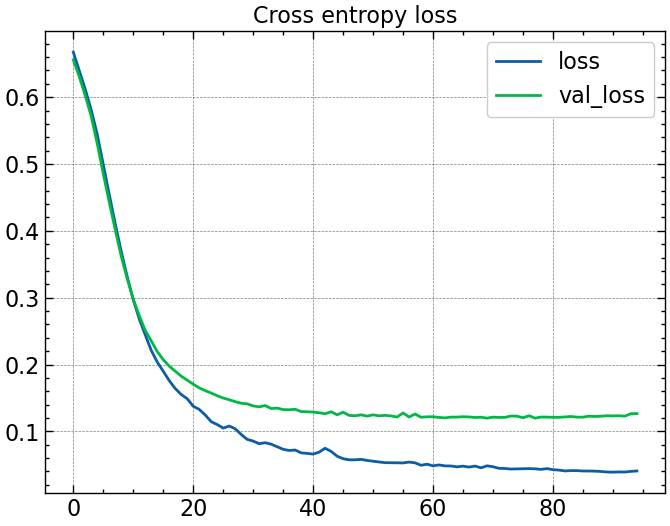

In [36]:
losses[['loss','val_loss']].plot();
plt.title('Cross entropy loss');

## Menambahkan Dropout

In [37]:
model = Sequential()

model.add(Dense(30, activation='relu')) # input layers
model.add(Dropout(0.5)) # dropout
model.add(Dense(15, activation='relu')) # hidden layers
model.add(Dropout(0.5)) # dropout

model.add(Dense(1, activation='sigmoid')) # output
#compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics =['accuracy'])

In [38]:
early_stop = EarlyStopping(monitor='val_loss', patience=25)

In [39]:
model.fit(X_train, y_train, 
          epochs = 600, 
          validation_data=(X_test, y_test),
          callbacks =[early_stop], 
          verbose=1)

Epoch 1/600
13/13 [==============================] - 3s 64ms/step - loss: 0.7241 - accuracy: 0.5000 - val_loss: 0.6960 - val_accuracy: 0.5205
Epoch 2/600
13/13 [==============================] - 0s 15ms/step - loss: 0.7139 - accuracy: 0.5251 - val_loss: 0.6787 - val_accuracy: 0.6784
Epoch 3/600
13/13 [==============================] - 0s 15ms/step - loss: 0.6768 - accuracy: 0.5829 - val_loss: 0.6593 - val_accuracy: 0.7895
Epoch 4/600
13/13 [==============================] - 0s 15ms/step - loss: 0.6649 - accuracy: 0.6658 - val_loss: 0.6345 - val_accuracy: 0.8713
Epoch 5/600
13/13 [==============================] - 0s 15ms/step - loss: 0.6257 - accuracy: 0.7010 - val_loss: 0.6081 - val_accuracy: 0.8713
Epoch 6/600
13/13 [==============================] - 0s 15ms/step - loss: 0.6113 - accuracy: 0.7312 - val_loss: 0.5824 - val_accuracy: 0.8772
Epoch 7/600
13/13 [==============================] - 0s 16ms/step - loss: 0.5888 - accuracy: 0.7688 - val_loss: 0.5579 - val_accuracy: 0.9064
Epoch 

13/13 [==============================] - 0s 17ms/step - loss: 0.0911 - accuracy: 0.9573 - val_loss: 0.1077 - val_accuracy: 0.9708
Epoch 116/600
13/13 [==============================] - 0s 16ms/step - loss: 0.0922 - accuracy: 0.9573 - val_loss: 0.1058 - val_accuracy: 0.9766
Epoch 117/600
13/13 [==============================] - 0s 17ms/step - loss: 0.0947 - accuracy: 0.9749 - val_loss: 0.1066 - val_accuracy: 0.9766
Epoch 118/600
13/13 [==============================] - 0s 16ms/step - loss: 0.0727 - accuracy: 0.9749 - val_loss: 0.1072 - val_accuracy: 0.9708
Epoch 119/600
13/13 [==============================] - 0s 16ms/step - loss: 0.0749 - accuracy: 0.9774 - val_loss: 0.1095 - val_accuracy: 0.9708
Epoch 120/600
13/13 [==============================] - 0s 16ms/step - loss: 0.0696 - accuracy: 0.9724 - val_loss: 0.1061 - val_accuracy: 0.9766
Epoch 121/600
13/13 [==============================] - 0s 17ms/step - loss: 0.0631 - accuracy: 0.9774 - val_loss: 0.1171 - val_accuracy: 0.9708
Epoch 

In [40]:
losses = pd.DataFrame(model.history.history)

In [41]:
losses

,loss,accuracy,val_loss,val_accuracy
0,0.724059,0.500000,0.696036,0.520468
1,0.713880,0.525126,0.678747,0.678363
2,0.676832,0.582915,0.659288,0.789474
3,0.664949,0.665829,0.634507,0.871345
4,0.625732,0.701005,0.608083,0.871345
...,...,...,...,...
120,0.063101,0.977387,0.117121,0.970760
121,0.066002,0.982412,0.110664,0.970760
122,0.085465,0.969849,0.108981,0.970760
123,0.074070,0.967337,0.104627,0.976608


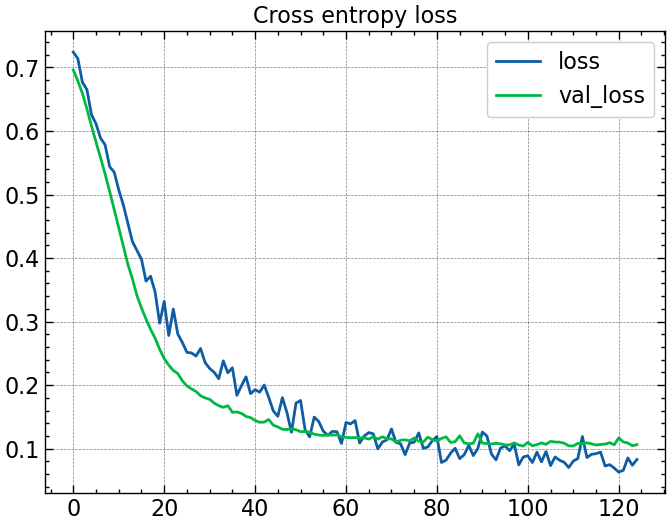

In [42]:
losses[['loss','val_loss']].plot()
plt.title('Cross entropy loss');

## Prediction

In [57]:
prediction = (model.predict(X_test)> 0.5).astype('int32')

6/6 [==============================] - 0s 6ms/step


In [59]:
prediction[:5]

array([[1],
       [1],
       [1],
       [0],
       [1]])

## Model Evaluation 


In [43]:
from sklearn.metrics import classification_report, confusion_matrix

In [61]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98        66
           1       0.98      0.99      0.99       105

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [66]:
confusion_matrix( y_test, prediction)

array([[ 64,   2],
       [  1, 104]], dtype=int64)

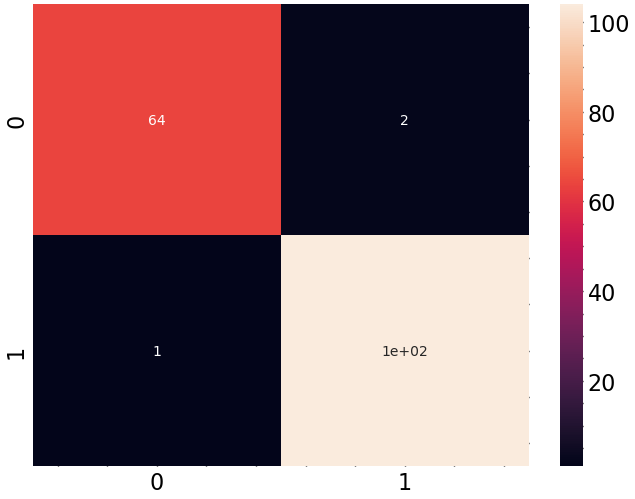

In [70]:
sns.heatmap(confusion_matrix(y_test, prediction), annot=True);

## Model save

In [71]:
from tensorflow.keras.models import load_model

In [72]:
model.save('cancer_classifier.h5')

## Gread job!